# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11501568/11490434 [==============================] - 0s 0us/step


**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 15s 36ms/step - loss: 0.6239 - accuracy: 0.8140 - val_loss: 0.2684 - val_accuracy: 0.9182
Epoch 2/10
375/375 [==============================] - 8s 20ms/step - loss: 0.2494 - accuracy: 0.9215 - val_loss: 0.1842 - val_accuracy: 0.9453
Epoch 3/10
375/375 [==============================] - 7s 19ms/step - loss: 0.1619 - accuracy: 0.9503 - val_loss: 0.1713 - val_accuracy: 0.9488
Epoch 4/10
375/375 [==============================] - 7s 19ms/step - loss: 0.1152 - accuracy: 0.9638 - val_loss: 0.1692 - val_accuracy: 0.9457
Epoch 5/10
375/375 [==============================] - 7s 19ms/step - loss: 0.0829 - accuracy: 0.9732 - val_loss: 0.1611 - val_accuracy: 0.9527
Epoch 6/10
375/375 [==============================] - 7s 19ms/step - loss: 0.0613 - accuracy: 0.9803 - val_loss: 0.1466 - val_accuracy: 0.9582
Epoch 7/10
375/375 [==============================] - 8s 22ms/step - loss: 0.0454 - accuracy: 0.9852 - val_loss: 0.1210 - val_accuracy: 0.966

**Plotting a validation accuracy comparison**

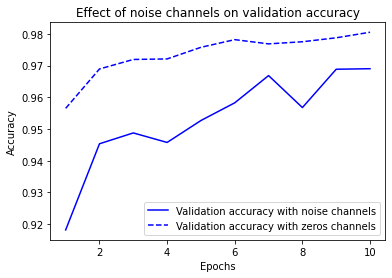

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [4]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 5s 12ms/step - loss: 2.3175 - accuracy: 0.1037 - val_loss: 2.3069 - val_accuracy: 0.1059
Epoch 2/100
375/375 [==============================] - 4s 12ms/step - loss: 2.2995 - accuracy: 0.1190 - val_loss: 2.3113 - val_accuracy: 0.1005
Epoch 3/100
375/375 [==============================] - 5s 14ms/step - loss: 2.2912 - accuracy: 0.1272 - val_loss: 2.3180 - val_accuracy: 0.1015
Epoch 4/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2773 - accuracy: 0.1401 - val_loss: 2.3232 - val_accuracy: 0.1004
Epoch 5/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2589 - accuracy: 0.1535 - val_loss: 2.3351 - val_accuracy: 0.1008
Epoch 6/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2380 - accuracy: 0.1708 - val_loss: 2.3645 - val_accuracy: 0.1000
Epoch 7/100
375/375 [==============================] - 8s 21ms/step - loss: 2.2131 - accuracy: 0.1863 - val_loss: 2.3619 - val_accuracy:

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 13ms/step - loss: 949.1863 - accuracy: 0.3452 - val_loss: 2.9513 - val_accuracy: 0.2405
Epoch 2/10
375/375 [==============================] - 5s 12ms/step - loss: 5.6808 - accuracy: 0.2436 - val_loss: 2.7176 - val_accuracy: 0.2608
Epoch 3/10
375/375 [==============================] - 4s 12ms/step - loss: 2.9254 - accuracy: 0.2518 - val_loss: 2.2290 - val_accuracy: 0.3201
Epoch 4/10
375/375 [==============================] - 5s 13ms/step - loss: 2.7599 - accuracy: 0.2474 - val_loss: 2.5460 - val_accuracy: 0.1790
Epoch 5/10
375/375 [==============================] - 5s 12ms/step - loss: 2.7171 - accuracy: 0.2432 - val_loss: 2.5673 - val_accuracy: 0.2818
Epoch 6/10
375/375 [==============================] - 4s 12ms/step - loss: 2.5294 - accuracy: 0.2598 - val_loss: 2.0989 - val_accuracy: 0.2186
Epoch 7/10
375/375 [==============================] - 4s 12ms/step - loss: 2.3514 - accuracy: 0.2143 - val_loss: 2.1869 - val_accuracy: 0.23

**The same model with a more appropriate learning rate**

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 12ms/step - loss: 0.3360 - accuracy: 0.9144 - val_loss: 0.1461 - val_accuracy: 0.9615
Epoch 2/10
375/375 [==============================] - 4s 12ms/step - loss: 0.1444 - accuracy: 0.9634 - val_loss: 0.1892 - val_accuracy: 0.9582
Epoch 3/10
375/375 [==============================] - 4s 12ms/step - loss: 0.1203 - accuracy: 0.9725 - val_loss: 0.2098 - val_accuracy: 0.9622
Epoch 4/10
375/375 [==============================] - 4s 12ms/step - loss: 0.1039 - accuracy: 0.9774 - val_loss: 0.2014 - val_accuracy: 0.9691
Epoch 5/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0975 - accuracy: 0.9803 - val_loss: 0.2008 - val_accuracy: 0.9697
Epoch 6/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0772 - accuracy: 0.9837 - val_loss: 0.2086 - val_accuracy: 0.9727
Epoch 7/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0764 - accuracy: 0.9864 - val_loss: 0.2826 - val_accuracy: 0.9687

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [7]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6703 - accuracy: 0.8370 - val_loss: 0.3571 - val_accuracy: 0.9043
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3512 - accuracy: 0.9044 - val_loss: 0.3077 - val_accuracy: 0.9149
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3158 - accuracy: 0.9123 - val_loss: 0.2895 - val_accuracy: 0.9198
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2993 - accuracy: 0.9163 - val_loss: 0.2804 - val_accuracy: 0.9227
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2896 - accuracy: 0.9193 - val_loss: 0.2750 - val_accuracy: 0.9253
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2829 - accuracy: 0.9200 - val_loss: 0.2719 - val_accuracy: 0.9243
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2781 - accuracy: 0.9224 - val_loss: 0.2693 - val_accuracy: 0.9265
Epoch 

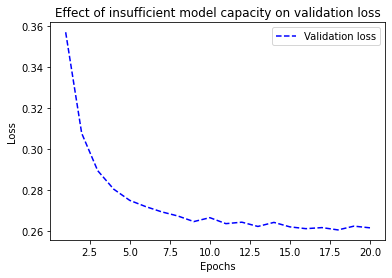

In [8]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [9]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 6ms/step - loss: 0.3594 - accuracy: 0.8976 - val_loss: 0.1775 - val_accuracy: 0.9498
Epoch 2/20
375/375 [==============================] - 2s 6ms/step - loss: 0.1573 - accuracy: 0.9532 - val_loss: 0.1441 - val_accuracy: 0.9569
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1106 - accuracy: 0.9667 - val_loss: 0.1364 - val_accuracy: 0.9593
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0846 - accuracy: 0.9747 - val_loss: 0.0945 - val_accuracy: 0.9721
Epoch 5/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0686 - accuracy: 0.9797 - val_loss: 0.0952 - val_accuracy: 0.9724
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0555 - accuracy: 0.9833 - val_loss: 0.0926 - val_accuracy: 0.9731
Epoch 7/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0463 - accuracy: 0.9858 - val_loss: 0.0903 - val_accuracy: 0.9751
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [10]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17473536/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.5237 - accuracy: 0.7885 - val_loss: 0.3863 - val_accuracy: 0.8765
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3078 - accuracy: 0.9003 - val_loss: 0.3011 - val_accuracy: 0.8899
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2267 - accuracy: 0.9255 - val_loss: 0.3297 - val_accuracy: 0.8643
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1815 - accuracy: 0.9398 - val_loss: 0.2729 - val_accuracy: 0.8930
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1447 - accuracy: 0.9550 - val_loss: 0.2976 - val_accuracy: 0.8817
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1242 - accuracy: 0.9611 - val_loss: 0.2932 - val_accuracy: 0.8869
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1014 - accurac

**Version of the model with lower capacity**

In [11]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.5759 - accuracy: 0.7727 - val_loss: 0.4870 - val_accuracy: 0.8470
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.4219 - accuracy: 0.8869 - val_loss: 0.3959 - val_accuracy: 0.8732
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3334 - accuracy: 0.9106 - val_loss: 0.3435 - val_accuracy: 0.8856
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2736 - accuracy: 0.9235 - val_loss: 0.3109 - val_accuracy: 0.8900
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2310 - accuracy: 0.9340 - val_loss: 0.2915 - val_accuracy: 0.8911
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1996 - accuracy: 0.9426 - val_loss: 0.2842 - val_accuracy: 0.8903
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1746 - accuracy: 0.9499 - val_loss: 0.2816 - val_accuracy: 0.8906
Epoch 8/20
30

**Version of the model with higher capacity**

In [12]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 12s 361ms/step - loss: 0.5496 - accuracy: 0.7558 - val_loss: 0.3912 - val_accuracy: 0.8272
Epoch 2/20
30/30 [==============================] - 9s 299ms/step - loss: 0.2592 - accuracy: 0.8975 - val_loss: 0.3179 - val_accuracy: 0.8732
Epoch 3/20
30/30 [==============================] - 9s 297ms/step - loss: 0.1559 - accuracy: 0.9400 - val_loss: 0.3079 - val_accuracy: 0.8915
Epoch 4/20
30/30 [==============================] - 9s 299ms/step - loss: 0.0716 - accuracy: 0.9739 - val_loss: 0.4070 - val_accuracy: 0.8835
Epoch 5/20
30/30 [==============================] - 9s 297ms/step - loss: 0.1103 - accuracy: 0.9754 - val_loss: 0.3711 - val_accuracy: 0.8849
Epoch 6/20
30/30 [==============================] - 9s 294ms/step - loss: 0.0044 - accuracy: 0.9995 - val_loss: 0.5111 - val_accuracy: 0.8869
Epoch 7/20
30/30 [==============================] - 9s 299ms/step - loss: 7.4667e-04 - accuracy: 0.9999 - val_loss: 0.6576 - val_accuracy: 0.8757
E

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [13]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 46ms/step - loss: 0.5907 - accuracy: 0.7737 - val_loss: 0.5003 - val_accuracy: 0.8133
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3908 - accuracy: 0.8963 - val_loss: 0.4042 - val_accuracy: 0.8697
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3233 - accuracy: 0.9175 - val_loss: 0.3607 - val_accuracy: 0.8885
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2879 - accuracy: 0.9297 - val_loss: 0.3943 - val_accuracy: 0.8684
Epoch 5/20
30/30 [==============================] - 2s 68ms/step - loss: 0.2735 - accuracy: 0.9338 - val_loss: 0.3638 - val_accuracy: 0.8828
Epoch 6/20
30/30 [==============================] - 1s 45ms/step - loss: 0.2613 - accuracy: 0.9375 - val_loss: 0.3634 - val_accuracy: 0.8844
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2489 - accuracy: 0.9429 - val_loss: 0.3658 - val_accuracy: 0.8848
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [14]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 49ms/step - loss: 0.6402 - accuracy: 0.6345 - val_loss: 0.5313 - val_accuracy: 0.8387
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.5195 - accuracy: 0.7739 - val_loss: 0.4071 - val_accuracy: 0.8671
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.4273 - accuracy: 0.8313 - val_loss: 0.3349 - val_accuracy: 0.8791
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3688 - accuracy: 0.8597 - val_loss: 0.2999 - val_accuracy: 0.8857
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3142 - accuracy: 0.8861 - val_loss: 0.2809 - val_accuracy: 0.8909
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2689 - accuracy: 0.9089 - val_loss: 0.2830 - val_accuracy: 0.8899
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2430 - accuracy: 0.9155 - val_loss: 0.2780 - val_accuracy: 0.8909
Epoch 8/20
30

## Summary